In [44]:
print("python")

python


In [45]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


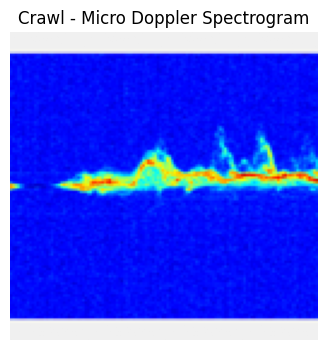

In [46]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to ONE spectrogram image
img_path = "../data/raw/24GHz/Crawl/01110010_1573838764.png"

# Load image
img = mpimg.imread(img_path)

# Plot
plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.title("Crawl - Micro Doppler Spectrogram")
plt.axis("off")
plt.show()


In [47]:
import os
print(os.getcwd())

d:\micro_doppler_target_classification\notebooks


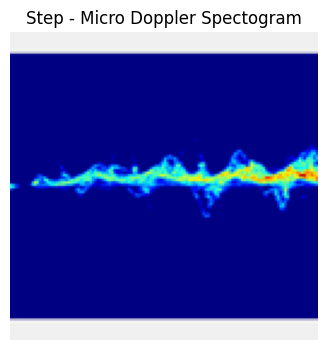

In [48]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "../data/raw/24GHz/SStep/01190010_1573840686.png"
img = mpimg.imread(img_path)

plt.figure(figsize = (6,4))
plt.imshow(img)
plt.title("Step - Micro Doppler Spectogram")
plt.axis("off")
plt.show()

In [49]:
label_map = {
    "Crawl": 0,
    "SStep": 1,
    "Towards": 2
}


In [50]:
import os

PROJECT_ROOT = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_ROOT, "data", "raw", "24GHz")


In [51]:
import cv2
import numpy as np

images = []
labels = []

IMG_SIZE = 128  # resize for CNN

for class_name, label in label_map.items():
    class_dir = os.path.join(DATA_DIR, class_name)
    
    for file in os.listdir(class_dir):
        if file.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(class_dir, file)
            
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            images.append(img)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (181, 128, 128, 3)
Labels shape: (181,)


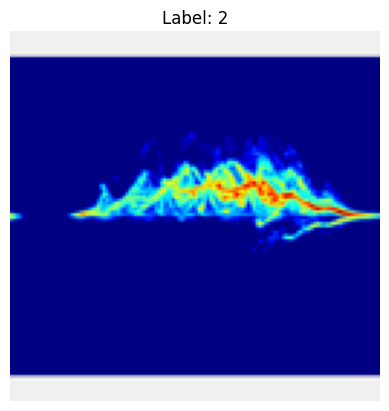

In [52]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(images)-1)
plt.imshow(images[idx])
plt.title(f"Label: {labels[idx]}")
plt.axis("off")
plt.show()


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    images, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)


In [54]:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0

print("Normalization check:", X_train.min(), X_train.max())
print("Train size:", len(X_train))
print("Test size:", len(X_val))


Normalization check: 0.0 1.0
Train size: 144
Test size: 37


In [55]:
import cv2
import numpy as np

images = []
labels = []

IMG_SIZE = 128  # resize for CNN

for class_name, label in label_map.items():
    class_dir = os.path.join(DATA_DIR, class_name)
    
    for file in os.listdir(class_dir):
        if file.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(class_dir, file)
            
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            images.append(img)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (181, 128, 128, 3)
Labels shape: (181,)


In [56]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(144, 128, 128, 3) (144,)
(37, 128, 128, 3) (37,)


In [65]:
print(images.min(), images.max())


0 255


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [58]:
model = Sequential([

    # Block 1
    Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),

    # Block 2
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    # Block 3
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    # Classifier
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")
])


d:\micro_doppler_target_classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [60]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=16
)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.4375 - loss: 1.0683 - val_accuracy: 0.7297 - val_loss: 0.8304
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.7153 - loss: 0.6779 - val_accuracy: 0.6486 - val_loss: 0.7061
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.8056 - loss: 0.4580 - val_accuracy: 0.8378 - val_loss: 0.4709
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.9028 - loss: 0.3345 - val_accuracy: 0.8919 - val_loss: 0.4907
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.9444 - loss: 0.1789 - val_accuracy: 0.8378 - val_loss: 0.3264
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.9583 - loss: 0.1494 - val_accuracy: 0.9459 - val_loss: 0.5054
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.9028 - loss: 0.2720 - val_accuracy: 0.8649 - val_loss: 0.4559
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9375 - loss: 0.1878 - val_accuracy: 0.8378 - val_loss:

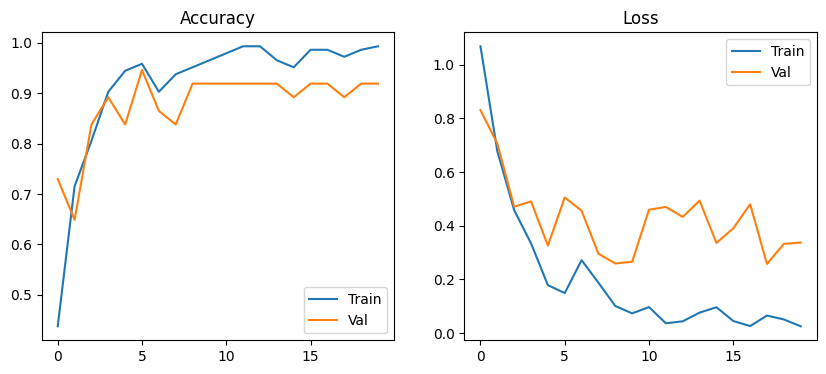

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

plt.show()


In [63]:
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_val)

# Convert probabilities → class index
y_pred = np.argmax(y_pred_probs, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(cm)


[[12  0  1]
 [ 1 10  1]
 [ 0  0 12]]


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.92        37
   macro avg       0.93      0.92      0.92        37
weighted avg       0.93      0.92      0.92        37

